In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['FreeSans']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df_hparam_score = []

for i in range(25):
    df = pd.read_csv(f'./logs/AIS_LSTM_model/version_{i}/metrics.csv')
    meta = pd.read_csv(f'./logs/AIS_LSTM_model/version_{i}/meta_tags.csv').set_index('key')
    df_hparam_score.append([i, meta.loc['latent_dim'].item(), meta.loc['lr'].item(), df['val_loss'].iloc[-1], df['val_mse'].iloc[-1]])
    
df_hparam_score = pd.DataFrame(df_hparam_score, columns=['trial', 'latent_dim', 'lr', 'val_loss', 'val_mse'])

In [21]:
df_hparam_score

,trial,latent_dim,lr,val_loss,val_mse
0,0,8.0,0.00001,495.260010,0.617590
1,1,8.0,0.00050,487.672241,0.579967
2,2,8.0,0.00010,488.081909,0.582033
3,3,8.0,0.00500,484.911957,0.566234
4,4,16.0,0.00100,464.413300,0.464608
5,5,16.0,0.00500,464.446320,0.464703
6,6,8.0,0.00100,485.658386,0.569969
7,7,16.0,0.00010,466.278809,0.473880
8,8,16.0,0.00050,464.648743,0.465748
9,9,32.0,0.00001,452.643555,0.406256


In [22]:
best_trial = df_hparam_score['val_loss'].idxmin()

In [27]:
df_hparam_score.loc[best_trial]

trial          15.000000
latent_dim     64.000000
lr              0.000500
val_loss      450.761414
val_mse         0.396904
Name: 15, dtype: float64

In [32]:
best_epoch = df_1['val_loss'].idxmin()
print(best_epoch)

203


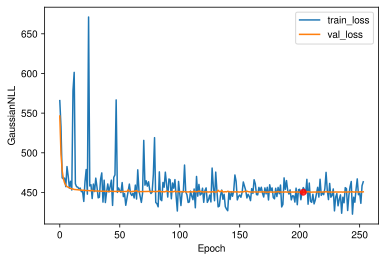

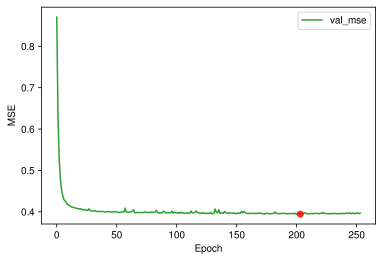

In [35]:
df = pd.read_csv(f'./logs/AIS_LSTM_model/version_{best_trial}/metrics.csv')
df_1 = df.drop(columns=['created_at']).groupby('epoch').mean().reset_index()

plt.plot(df_1['epoch'], df_1['train_loss'], label='train_loss')
plt.plot(df_1['epoch'], df_1['val_loss'], label='val_loss')
plt.plot(best_epoch, df_1['val_loss'].iloc[best_epoch], 'ro', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('GaussianNLL')
plt.legend()
plt.show()

plt.plot(df_1['epoch'], df_1['val_mse'], label='val_mse', color='tab:green')
plt.plot(best_epoch, df_1['val_mse'].iloc[best_epoch], 'ro', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()